# 概要
## データの読み込み、前処理
+ NIIのIRDB(https://irdb.nii.ac.jp/)の統計データを取得し、Pandas のDataFrameに読み込む

In [1]:
import pandas as pd
# df = pd.read_excel('2022irdb.xlsx', index_col=0)
df = pd.read_csv('2022irdb.csv', index_col=0)
print(df)

                  機関名                     リポジトリ名   対象年  対象月    総件数  本文あり件数  \
タイトル                                                                         
2022年01月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    1  11319   11230   
2022年02月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    2  11346   11262   
2022年03月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    3  11515   11358   
2022年04月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    4  11562   11477   
2022年05月       横浜国立大学            横浜国立大学学術情報リポジトリ  2022    5  11631   11542   
...               ...                        ...   ...  ...    ...     ...   
2022年07月   地球環境戦略研究機関  地球環境戦略研究機関(IGES) 出版物リポジトリ  2022    7   1735     956   
2022年08月   地球環境戦略研究機関  地球環境戦略研究機関(IGES) 出版物リポジトリ  2022    8   1747     963   
2022年07月  東京国際工科専門職大学           東京国際工科専門職大学リポジトリ  2022    7      0       0   
2022年08月  東京国際工科専門職大学           東京国際工科専門職大学リポジトリ  2022    8     14      14   
2022年08月       新潟薬科大学                新潟薬科大学リポジトリ  2022    8     

In [2]:
# 統計データから、ある月分を抽出
df2205 = df.loc['2022年05月']
df2205.tail(2)

,機関名,リポジトリ名,対象年,対象月,総件数,本文あり件数,DOI付与件数,embargoed access(全件数),metadata only access(全件数),restricted access(全件数),...,research proposal(本文あり),software(本文あり).1,technical documentation(本文あり),workflow(本文あり),data management plan(本文あり),interview(本文あり),manuscript(本文あり),newspaper(本文あり),software paper(本文あり),other(本文あり)
タイトル,,,,,,,,,,,,,,,,,,,,,
2022年05月,高知学園大学,高知学園大学・高知学園短期大学学術機関リポジトリ,2022,5,32,32,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022年05月,同志社大学,同志社大学デジタルコレクション,2022,5,902,902,0,0,0,0,...,0,0,0,0,0,0,26,0,0,0


In [3]:
# 機関名をインデクスにセット
df2205i = df2205.set_index('機関名')
print(df2205i)

                                 リポジトリ名   対象年  対象月    総件数  本文あり件数  DOI付与件数  \
機関名                                                                          
横浜国立大学                  横浜国立大学学術情報リポジトリ  2022    5  11631   11542     1911   
横浜商科大学                    横浜商科大学機関リポジトリ  2022    5   1533    1533        0   
横浜市立大学                  横浜市立大学学術機関リポジトリ  2022    5   2088    2062      546   
安田女子大学                      安田女子大学リポジトリ  2022    5    538     538      537   
山梨県立大学                    山梨県立大学機関リポジトリ  2022    5   1362    1362        0   
...                                 ...   ...  ...    ...     ...      ...   
静岡県立農林環境専門職大学        静岡県立農林環境専門職大学リポジトリ  2022    5     21      21        0   
産業技術短期大学                  産業技術短期大学リポジトリ  2022    5     25      25        0   
一宮研伸大学                      一宮研伸大学リポジトリ  2022    5      8       8        0   
高知学園大学         高知学園大学・高知学園短期大学学術機関リポジトリ  2022    5     32      32        6   
同志社大学                   同志社大学デジタルコレクション  2022    5    902     90

In [4]:
# df2205iを全件数と、本文ありとに分け、差分（メタデータのみ）を取り出す。
# print(df2205i.iloc[:,17:64].columns)
# print(df2205i.iloc[:,75:].columns)
df2205_all = df2205i.iloc[:,17:64]
df2205_honbun = df2205i.iloc[:,75:]

df2205_all.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
       
df2205_honbun.set_axis(['conference paper', 'data paper',
       'departmental bulletin paper', 'editorial',
       'journal article', 'periodical', 'review article',
       'article', 'book', 'book part',
       'cartographic material', 'map', 'conference object',
       'conference proceedings', 'conference poster', 'dataset',
       'image', 'still image', 'moving image', 'video',
       'lecture', 'patent', 'internal report', 'report',
       'research report', 'technical report', 'policy report',
       'report part', 'working paper', 'sound', 'thesis',
       'bachelor thesis', 'master thesis', 'doctoral thesis',
       'interactive resource', 'learning object',
       'musical notation', 'research proposal', 'software',
       'technical documentation', 'workflow',
       'data management plan', 'interview', 'manuscript',
       'newspaper', 'software paper', 'other'], axis=1, inplace=True)
# df2205_all.tail(2)
# df2205_honbun.tail(2)
# 全体-本文の差分（メタデータのみ）
df2205_sabun = df2205_all - df2205_honbun
df2205_sabun.describe()        # sample(5)


C:\Users\libso23-user\AppData\Local\Temp\ipykernel_24740\3594452581.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df2205_all.set_axis(['conference paper', 'data paper',
C:\Users\libso23-user\AppData\Local\Temp\ipykernel_24740\3594452581.py:24: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df2205_honbun.set_axis(['conference paper', 'data paper',


,conference paper,data paper,departmental bulletin paper,editorial,journal article,periodical,review article,article,book,book part,...,research proposal,software,technical documentation,workflow,data management plan,interview,manuscript,newspaper,software paper,other
count,775.000000,775.000000,775.000000,775.0,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,...,775.0,775.000000,775.0,775.0,775.0,775.0,775.0,775.0,775.0,775.000000
mean,189.076129,0.001290,221.301935,0.0,280.781935,1.894194,0.002581,93.966452,21.023226,0.006452,...,0.0,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.281290
std,4687.029182,0.035921,903.911428,0.0,5091.223845,37.274374,0.071842,1883.259014,456.463806,0.179605,...,0.0,0.359211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,621.473487
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,21.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,130072.000000,1.000000,12329.000000,0.0,140152.000000,752.000000,2.000000,51225.000000,12676.000000,5.000000,...,0.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9351.000000


# 47個の資源タイプを、大項目13個にまとめる

In [5]:
# 13項目に列をまとめる(全件)
df2205_all['Kiyou'] = df2205_all['departmental bulletin paper']

df2205_all['Article'] =  df2205_all['conference paper']
+df2205_all['data paper']
+df2205_all['editorial']
+df2205_all['journal article']
+df2205_all['newspaper']
+df2205_all['periodical']
+df2205_all['review article']
+df2205_all['software paper']
+df2205_all['article']

df2205_all['Book'] = df2205_all['book']
+df2205_all['book part']

df2205_all['Cartographic Material'] = df2205_all['cartographic material']
+df2205_all['map']

df2205_all['Conference object'] = df2205_all['conference object']
+df2205_all['conference proceedings']
+df2205_all['conference poster']

df2205_all['Dataset'] = df2205_all['dataset']
+df2205_all['interview']

df2205_all['Image'] = df2205_all['image']
+df2205_all['still image']
+df2205_all['moving image']
+df2205_all['video']

df2205_all['Lecture'] = df2205_all['lecture']
df2205_all['Patent'] = df2205_all['patent']

df2205_all['Report'] = df2205_all['internal report']
+df2205_all['report']
+df2205_all['research report']
+df2205_all['technical report']
+df2205_all['policy report']
+df2205_all['report part']
+df2205_all['working paper']
+df2205_all['data management plan']

df2205_all['Sound'] = df2205_all['sound']

df2205_all['Thesis'] = df2205_all['thesis']
+df2205_all['bachelor thesis']
+df2205_all['master thesis']
+df2205_all['doctoral thesis']

df2205_all['Multiple'] = df2205_all['interactive resource']
+df2205_all['learning object']
+df2205_all['manuscript']
+df2205_all['musical notation']
+df2205_all['research proposal']
+df2205_all['software']
+df2205_all['technical documentation']
+df2205_all['workflow']
+df2205_all['other']

機関名
横浜国立大学           1093
横浜商科大学            718
横浜市立大学            211
安田女子大学              0
山梨県立大学              4
                 ... 
静岡県立農林環境専門職大学       9
産業技術短期大学            0
一宮研伸大学              0
高知学園大学              0
同志社大学               0
Name: other, Length: 775, dtype: int64

In [6]:
# 13項目に列をまとめる（本文あり）
df2205_honbun['Kiyou'] = df2205_honbun['departmental bulletin paper']

df2205_honbun['Article'] = df2205_honbun['conference paper']
+df2205_honbun['data paper']
+df2205_honbun['editorial']
+df2205_honbun['journal article']
+df2205_honbun['newspaper']
+df2205_honbun['periodical']
+df2205_honbun['review article']
+df2205_honbun['software paper']
+df2205_honbun['article']

df2205_honbun['Book'] = df2205_honbun['book']
+df2205_honbun['book part']

df2205_honbun['Cartographic Material'] = df2205_honbun['cartographic material']
+df2205_honbun['map']

df2205_honbun['Conference object'] = df2205_honbun['conference object']
+df2205_honbun['conference proceedings']
+df2205_honbun['conference poster']

df2205_honbun['Dataset'] = df2205_honbun['dataset']
+df2205_honbun['interview']

df2205_honbun['Image'] = df2205_honbun['image']
+df2205_honbun['still image']
+df2205_honbun['moving image']
+df2205_honbun['video']

df2205_honbun['Lecture'] = df2205_honbun['lecture']
df2205_honbun['Patent'] = df2205_honbun['patent']

df2205_honbun['Report'] = df2205_honbun['internal report']
+df2205_honbun['report']
+df2205_honbun['research report']
+df2205_honbun['technical report']
+df2205_honbun['policy report']
+df2205_honbun['report part']
+df2205_honbun['working paper']
+df2205_honbun['data management plan']

df2205_honbun['Sound'] = df2205_honbun['sound']

df2205_honbun['Thesis'] = df2205_honbun['thesis']
+df2205_honbun['bachelor thesis']
+df2205_honbun['master thesis']
+df2205_honbun['doctoral thesis']

df2205_honbun['Multiple'] = df2205_honbun['interactive resource']
+df2205_honbun['learning object']
+df2205_honbun['manuscript']
+df2205_honbun['musical notation']
+df2205_honbun['research proposal']
+df2205_honbun['software']
+df2205_honbun['technical documentation']
+df2205_honbun['workflow']
+df2205_honbun['other']


機関名
横浜国立大学           1093
横浜商科大学            718
横浜市立大学            211
安田女子大学              0
山梨県立大学              4
                 ... 
静岡県立農林環境専門職大学       9
産業技術短期大学            0
一宮研伸大学              0
高知学園大学              0
同志社大学               0
Name: other, Length: 775, dtype: int64

In [7]:
# 13項目に列をまとめる（差分：全件ー本文あり＝メタのみ）
df2205_sabun['Kiyou'] = df2205_sabun['departmental bulletin paper']

df2205_sabun['Article'] =  df2205_sabun['conference paper']
+df2205_sabun['data paper']
+df2205_sabun['editorial']
+df2205_sabun['journal article']
+df2205_sabun['newspaper']
+df2205_sabun['periodical']
+df2205_sabun['review article']
+df2205_sabun['software paper']
+df2205_sabun['article']

df2205_sabun['Book'] = df2205_sabun['book']
+df2205_sabun['book part']

df2205_sabun['Cartographic Material'] = df2205_sabun['cartographic material']
+df2205_sabun['map']

df2205_sabun['Conference object'] = df2205_sabun['conference object']
+df2205_sabun['conference proceedings']
+df2205_sabun['conference poster']

df2205_sabun['Dataset'] = df2205_sabun['dataset']
+df2205_sabun['interview']

df2205_sabun['Image'] = df2205_sabun['image']
+df2205_sabun['still image']
+df2205_sabun['moving image']
+df2205_sabun['video']

df2205_sabun['Lecture'] = df2205_sabun['lecture']
df2205_sabun['Patent'] = df2205_sabun['patent']

df2205_sabun['Report'] = df2205_sabun['internal report']
+df2205_sabun['report']
+df2205_sabun['research report']
+df2205_sabun['technical report']
+df2205_sabun['policy report']
+df2205_sabun['report part']
+df2205_sabun['working paper']
+df2205_sabun['data management plan']

df2205_sabun['Sound'] = df2205_sabun['sound']

df2205_sabun['Thesis'] = df2205_sabun['thesis']
+df2205_sabun['bachelor thesis']
+df2205_sabun['master thesis']
+df2205_sabun['doctoral thesis']

df2205_sabun['Multiple'] = df2205_sabun['interactive resource']
+df2205_sabun['learning object']
+df2205_sabun['manuscript']
+df2205_sabun['musical notation']
+df2205_sabun['research proposal']
+df2205_sabun['software']
+df2205_sabun['technical documentation']
+df2205_sabun['workflow']
+df2205_sabun['other']

機関名
横浜国立大学           0
横浜商科大学           0
横浜市立大学           0
安田女子大学           0
山梨県立大学           0
                ..
静岡県立農林環境専門職大学    0
産業技術短期大学         0
一宮研伸大学           0
高知学園大学           0
同志社大学            0
Name: other, Length: 775, dtype: int64

In [8]:
# 13項目にまとめる（まとめた後不要項目をdrop）
df2205_all_d = df2205_all.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_honbun_d = df2205_honbun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video', 'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
df2205_sabun_d = df2205_sabun.drop(['departmental bulletin paper', 'conference paper', 'data paper', 'editorial', 'journal article', 'newspaper', 'periodical', 'review article', 'software paper', 'article', 'book', 'book part', 'cartographic material', 'map', 'conference object', 'conference proceedings', 'conference poster', 'dataset', 'interview', 'image', 'still image', 'moving image', 'video',
                                    'lecture', 'patent', 'internal report', 'report', 'research report', 'technical report', 'policy report', 'report part', 'working paper', 'data management plan', 'sound', 'thesis', 'bachelor thesis', 'master thesis', 'doctoral thesis', 'interactive resource', 'learning object', 'manuscript', 'musical notation', 'research proposal', 'software', 'technical documentation', 'workflow', 'other'], axis=1)
print(df2205_sabun_d)
print(df2205_honbun_d)
# print(df2205_all_d)


               Kiyou  Article  Book  Cartographic Material  Conference object  \
機関名                                                                             
横浜国立大学             4        0     2                      0                  0   
横浜商科大学             0        0     0                      0                  0   
横浜市立大学             1        0     0                      0                  0   
安田女子大学             0        0     0                      0                  0   
山梨県立大学             0        0     0                      0                  0   
...              ...      ...   ...                    ...                ...   
静岡県立農林環境専門職大学      0        0     0                      0                  0   
産業技術短期大学           0        0     0                      0                  0   
一宮研伸大学             0        0     0                      0                  0   
高知学園大学             0        0     0                      0                  0   
同志社大学              0        

# 主成分分析をしてみる
https://corvus-window.com/python_pca/
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f
主成分分析（principal component analysis）とは多変量解析手法のうち次元削減手法としてよく用いられる手法の一種で、相関のある多変数から、相関のない少数で全体のばらつきを最もよく表す変数を合成します。
この時点で、13次元のデータですので、その散布図を可視化することは不可能です。そこで、主成分分析を用いて情報をなるべく失うことなく2次元へと次元圧縮をし、データの可視化をおこなってみる

In [9]:
df2205_all_d.describe()

,Kiyou,Article,Book,Cartographic Material,Conference object,Dataset,Image,Lecture,Patent,Report,Sound,Thesis,Multiple
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.0,775.0,775.000000,775.000000,775.0
mean,1998.610323,247.029677,78.385806,0.007742,91.567742,103.501935,6.185806,0.371613,0.0,0.0,0.009032,256.809032,0.0
std,5914.702750,4936.590774,645.409879,0.183117,1123.877810,1894.302064,172.133644,10.309361,0.0,0.0,0.251447,1496.501739,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,492.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
75%,1573.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,21.000000,0.0
max,122276.000000,136209.000000,12753.000000,5.000000,24569.000000,48966.000000,4792.000000,287.000000,0.0,0.0,7.000000,25181.000000,0.0


標準偏差が小さい(全体のバラツキが小さいということ、つまり、測定値の分布が平均値の周り に集まっているということ)列を削除

In [10]:
# 主成分分析の前処理
# df2205_all.head(3)
# print(df2205_all.dropna(how='all', axis=1))
# 分散 var() 標準偏差 std()
# print(df2205_all.var())
# 分散がゼロの列を抽出
# print(df2205_all_d.var(axis=0) > 0.5)
# 標準偏差が1以下の列を抽出
print(df2205_all_d.std(axis=0) > 1)

Kiyou                     True
Article                   True
Book                      True
Cartographic Material    False
Conference object         True
Dataset                   True
Image                     True
Lecture                   True
Patent                   False
Report                   False
Sound                    False
Thesis                    True
Multiple                 False
dtype: bool


In [11]:
# 分散varが 0 の列を削除
# 3列削除されて、10列（10項目）になる
# 標準偏差 std が1以下の列を削除
# var0 = (df2205_all_d.var(axis=0) > 0)  # []リストではだめだった,== だと分散0の列が抽出される 
std0 = (df2205_all_d.std(axis=0) > 1)  # []リストではだめだった,== だと分散0の列が抽出される 
# df2205_all_d.index[df2205_all_d.var(axis=0) < 0]
df2205_all_dstd = df2205_all_d.loc[:, std0]
df2205_all_dstd


,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
横浜国立大学,7187,113,454,13,0,0,0,441
横浜商科大学,809,0,0,0,0,0,0,0
横浜市立大学,989,0,0,0,0,0,0,730
安田女子大学,532,0,0,0,0,0,0,0
山梨県立大学,1102,0,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...
静岡県立農林環境専門職大学,11,0,0,0,0,0,0,0
産業技術短期大学,25,0,0,0,0,0,0,0
一宮研伸大学,1,0,0,0,0,0,0,0


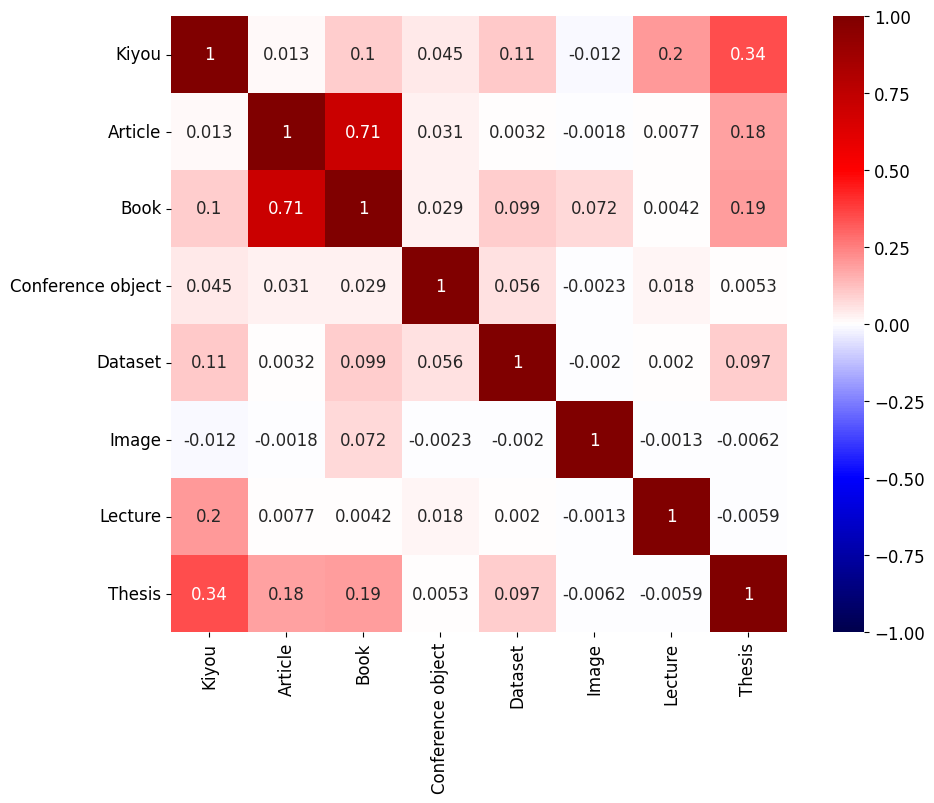

In [12]:
# 特徴量の確認（相関行列、散布図）
# 相関行列や散布図を用いて特徴量の分布などを確認していきます。
# ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

# 相関行列
correlation_coefficients = df2205_all_dstd.corr()  # 相関行列の計算
# 相関行列のヒートマップ (相関係数の値あり) 
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))  # この段階で画像のサイズを指定する
sns.heatmap(correlation_coefficients, vmax=1, vmin=-1, cmap='seismic', square=True, annot=True, xticklabels=1, yticklabels=1)
plt.xlim([0, correlation_coefficients.shape[0]])
plt.show()

In [13]:
# 行・列ごとに欠損値の個数をカウント
# print(df2205_all.isnull().sum(axis=0))
df2205_all_dstd.dropna(how='all', axis=0, inplace=True)

C:\Users\libso23-user\AppData\Local\Temp\ipykernel_24740\745399805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2205_all_dstd.dropna(how='all', axis=0, inplace=True)


In [14]:
# 変数の標準化
df2205_all_std = df2205_all_dstd.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df2205_all_std.sample(3)


,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
機関名,,,,,,,,
都留文科大学,-0.337905,-0.050041,-0.121451,-0.081475,-0.054639,-0.035936,-0.036046,-0.171606
神戸市看護大学,-0.304260,-0.050041,-0.121451,-0.081475,-0.054639,-0.035936,-0.036046,-0.163588
実践女子大学,-0.075170,-0.048825,-0.121451,-0.081475,-0.054639,-0.035936,-0.036046,-0.164924


In [15]:
df2205_all_std.describe()

,Kiyou,Article,Book,Conference object,Dataset,Image,Lecture,Thesis
count,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02
mean,1.260640e-17,-9.168293e-18,-9.168293e-18,-1.375244e-17,-2.292073e-18,-1.375244e-17,-2.292073e-18,-1.375244e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.379055e-01,-5.004054e-02,-1.214512e-01,-8.147482e-02,-5.463856e-02,-3.593607e-02,-3.604616e-02,-1.716062e-01
25%,-3.138975e-01,-5.004054e-02,-1.214512e-01,-8.147482e-02,-5.463856e-02,-3.593607e-02,-3.604616e-02,-1.716062e-01
50%,-2.547229e-01,-5.004054e-02,-1.214512e-01,-8.147482e-02,-5.463856e-02,-3.593607e-02,-3.604616e-02,-1.716062e-01
75%,-7.195802e-02,-5.004054e-02,-1.183524e-01,-8.147482e-02,-5.463856e-02,-3.593607e-02,-3.604616e-02,-1.575735e-01
max,2.033532e+01,2.754167e+01,1.963809e+01,2.177944e+01,2.579446e+01,2.780290e+01,2.780273e+01,1.665497e+01


In [16]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  
# 主成分分析の実行
pca = PCA()
pca.fit(df2205_all_std)

# データを主成分に変換
pca_row = pca.transform(df2205_all_std)
pca_row


array([[ 0.61462439,  0.42191594, -0.17572553, ..., -0.14502449,
         0.62703631,  0.34142326],
       [-0.24442647, -0.17477477, -0.03022115, ...,  0.0688853 ,
        -0.02635451, -0.03257087],
       [-0.04759676,  0.03130716, -0.02007375, ..., -0.11520621,
        -0.31387964, -0.00928147],
       ...,
       [-0.28149223, -0.26242331, -0.01293263, ...,  0.09110263,
        -0.11855023, -0.01766929],
       [-0.28007015, -0.25906056, -0.01359593, ...,  0.09025023,
        -0.11501302, -0.01824101],
       [ 0.54550603, -0.64170706, -0.05465936, ...,  0.23048801,
         0.09363661,  0.90975078]])

In [17]:
# 主成分得点
pd.DataFrame(pca_row, columns=["PC{}".format(x + 1)
              for x in range(len(df2205_all_std.columns))]).describe()
#              #.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,775.000000,7.750000e+02,7.750000e+02
mean,4.584147e-18,-6.876220e-18,-9.168293e-18,1.375244e-17,8.022257e-18,0.000000,2.292073e-17,2.292073e-18
std,1.367752e+00,1.150443e+00,1.014152e+00,1.004508e+00,9.978947e-01,0.951428,7.682854e-01,5.262335e-01
min,-2.815381e-01,-1.381202e+01,-1.444865e+01,-5.919230e+00,-8.749348e+00,-9.325270,-7.840978e+00,-5.148580e+00
25%,-2.709872e-01,-2.460241e-01,-4.329452e-02,-3.489983e-02,-3.960239e-02,0.034038,-1.084919e-01,-3.860575e-02
50%,-2.487352e-01,-2.064497e-01,-2.239965e-02,-2.260566e-02,-3.540047e-02,0.074550,-7.405216e-02,-2.320802e-02
75%,-1.586621e-01,-8.262141e-02,-1.518998e-02,-1.961316e-02,-2.026242e-02,0.086431,3.645058e-02,-1.796235e-02
max,3.037663e+01,1.417070e+01,1.676080e+01,1.615842e+01,2.197980e+01,16.511312,1.400831e+01,1.058848e+01


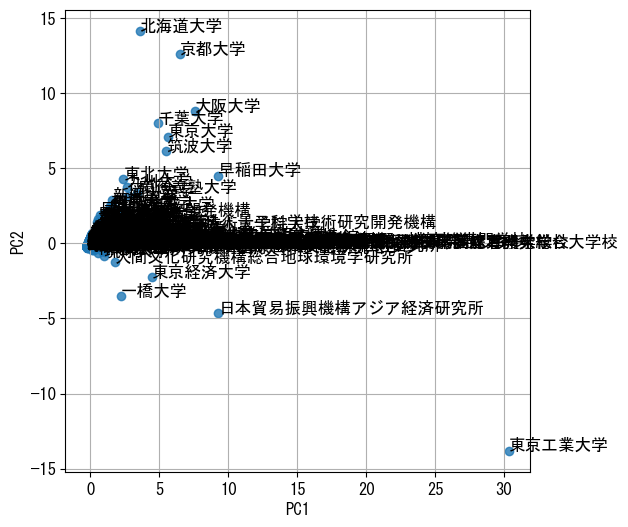

In [18]:
# 第一主成分と第二主成分でプロットする
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
plt.figure(figsize=(6, 6))
# ラベルにインデクス（機関名）を追加する
for x, y, name in zip(pca_row[:, 0], pca_row[:, 1], list(df2205_all_std.index)):
    plt.text(x, y, name)
plt.scatter(pca_row[:, 0], pca_row[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [41]:
# 外れ値（例外的に、値が大きな機関）を削除する
# ndのままでやると、DataFrameと食い違ってしまってプロットしたときラベルがおかしくなる
# pca_row2 = np.delete(pca_row, np.where(pca_row > 15)[0], axis=0)
# pca_row2.shape
# nd配列pca_rowをDataFrameにする
pca_row_df = pd.DataFrame(pca_row, index= list(df2205_all_std.index), columns=["PC{}".format(x + 1)
              for x in range(len(df2205_all_std.columns))])
outlier = list(pca_row_df[pca_row_df[['PC1','PC2']] > 10].dropna(how='all').index)
pca_row_df_o = pca_row_df.drop(outlier)
outlier

['東京工業大学', '京都大学', '北海道大学']

In [43]:
# pandas.DataFrameをNumPy配列ndarrayに変換
pca_row_o = pca_row_df_o.to_numpy()
pca_row_o

array([[ 0.61462439,  0.42191594, -0.17572553, ..., -0.14502449,
         0.62703631,  0.34142326],
       [-0.24442647, -0.17477477, -0.03022115, ...,  0.0688853 ,
        -0.02635451, -0.03257087],
       [-0.04759676,  0.03130716, -0.02007375, ..., -0.11520621,
        -0.31387964, -0.00928147],
       ...,
       [-0.28149223, -0.26242331, -0.01293263, ...,  0.09110263,
        -0.11855023, -0.01766929],
       [-0.28007015, -0.25906056, -0.01359593, ...,  0.09025023,
        -0.11501302, -0.01824101],
       [ 0.54550603, -0.64170706, -0.05465936, ...,  0.23048801,
         0.09363661,  0.90975078]])

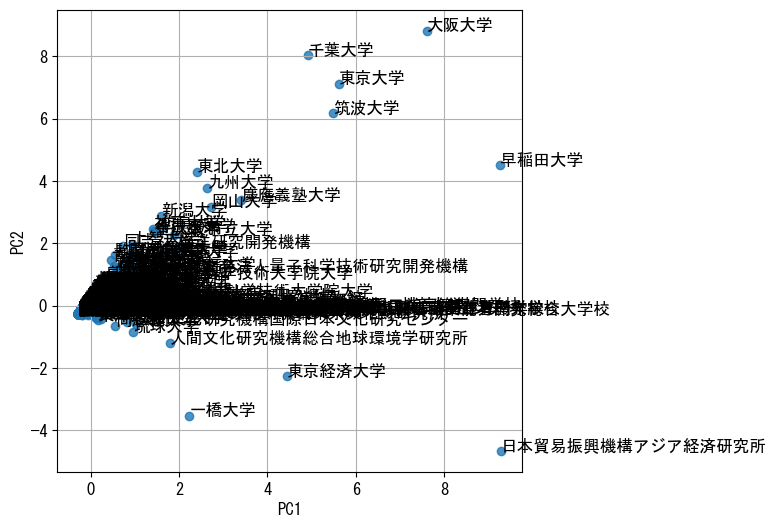

In [44]:
# 外れ値を除外した後で、
# 第一主成分と第二主成分でプロットする
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
plt.figure(figsize=(6, 6))
# ラベルにインデクス（機関名）を追加する
for x, y, name in zip(pca_row_o[:, 0], pca_row_o[:, 1], list(pca_row_df_o.index)):
    plt.text(x, y, name)
plt.scatter(pca_row_o[:, 0], pca_row_o[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


        PC1      PC2       PC3      PC4       PC5       PC6       PC7  \
0  0.233843  0.16544  0.128563  0.12613  0.124474  0.113152  0.073783   

        PC8  
0  0.034615  


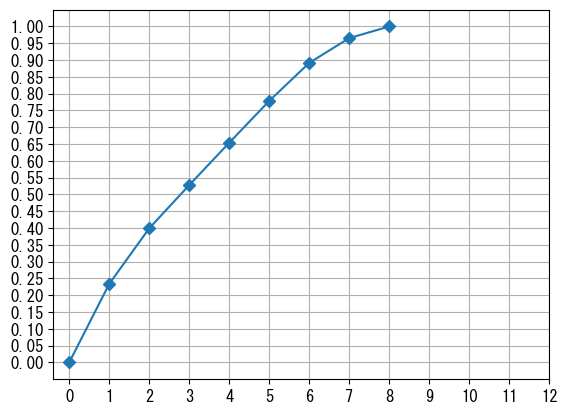

In [45]:
# 寄与率を求める
# pca_col = ["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))]
pca_col = ["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(13))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

第1主成分の寄与率は，0.299547 であることが分かります．また，累積寄与率は表現したグラフから第9主成分までで約80％の情報を説明できているということが分かります．

一般的には，累積寄与率が80％以上になる主成分数を採用して分析結果に用いることが多いです80％以上を目安に主成分を選択します．

② 主成分負荷量を求める

主成分負荷量とは，各主成分に対する各変数の影響度合いになります．-1から1の間の値を取り，絶対値が大きいほど影響度が大きくなります．主成分負荷量を求めることで，各主成分が何を意味しているかが分かりやすくなります

In [47]:
pca_row_o

array([[ 0.61462439,  0.42191594, -0.17572553, ..., -0.14502449,
         0.62703631,  0.34142326],
       [-0.24442647, -0.17477477, -0.03022115, ...,  0.0688853 ,
        -0.02635451, -0.03257087],
       [-0.04759676,  0.03130716, -0.02007375, ..., -0.11520621,
        -0.31387964, -0.00928147],
       ...,
       [-0.28149223, -0.26242331, -0.01293263, ...,  0.09110263,
        -0.11855023, -0.01766929],
       [-0.28007015, -0.25906056, -0.01359593, ...,  0.09025023,
        -0.11501302, -0.01824101],
       [ 0.54550603, -0.64170706, -0.05465936, ...,  0.23048801,
         0.09363661,  0.90975078]])

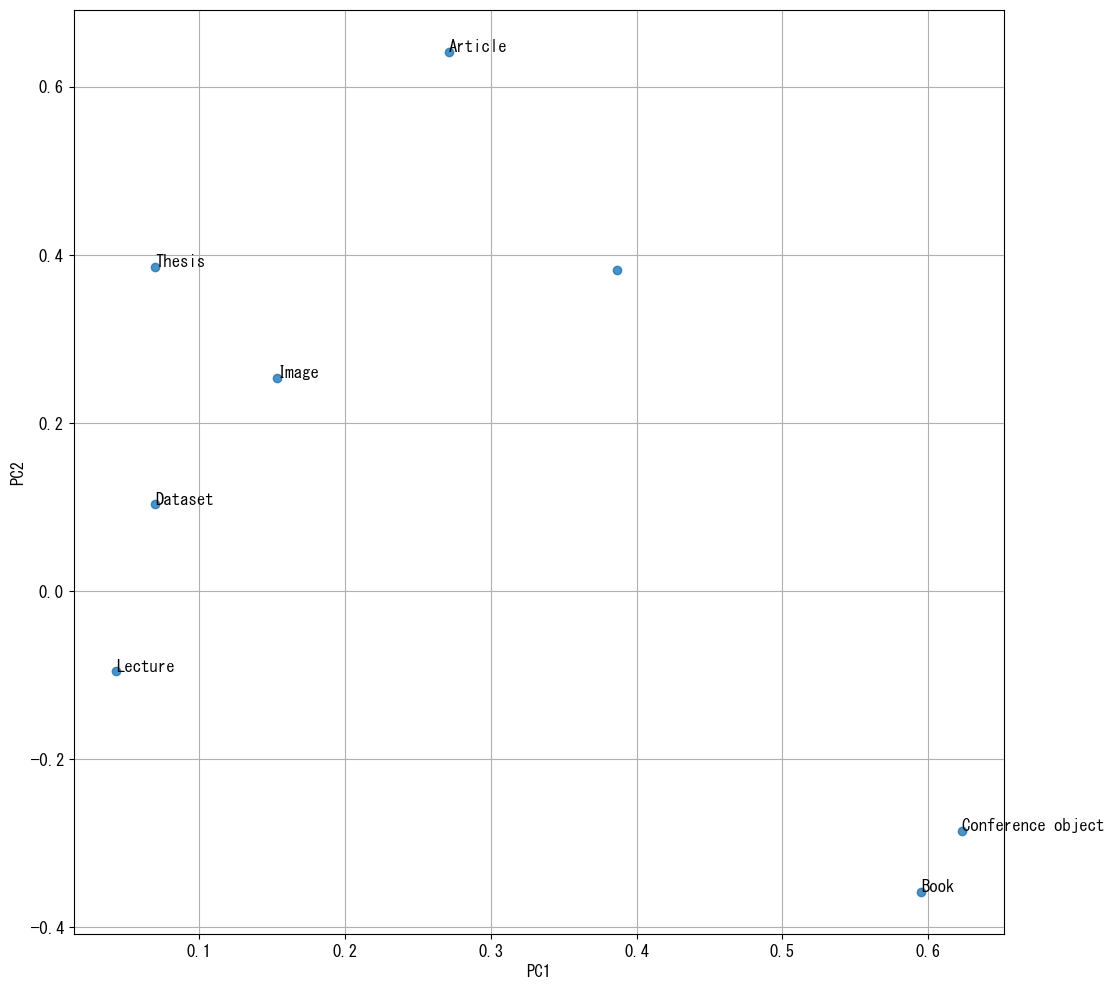

In [49]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
# 第一主成分と第二主成分における観測変数の寄与度をプロットすることにより、各成分が何を考慮した値なのかのヒントが得られます。
plt.figure(figsize=(12, 12))
pca_list = []
# for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_std.columns[1:]):
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all_dstd.columns[1:]):
    plt.text(x, y, name)
    pca_list.append([x, y, name])
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [51]:
pca_list

[[0.27132790626229186, 0.6416028278310613, 'Article'],
 [0.5948979842182318, -0.3578460663620563, 'Book'],
 [0.6228500038083666, -0.28555830495151086, 'Conference object'],
 [0.06945009090033301, 0.1030544894848134, 'Dataset'],
 [0.15353991218187416, 0.25341314735040626, 'Image'],
 [0.0428922285995038, -0.09578716309661116, 'Lecture'],
 [0.06970205646081135, 0.38532307123652343, 'Thesis']]

第1主成分に対して主成分負荷量が大きい項目は，Conference object と Bookであること、
第2主成分に対しては、'Article''Thesis'
がわかります．
kiyou は、全体的に量が多く、主成分には寄与していません。

In [56]:
len(df2205_all_std.columns) # 36
# std_index = df2205_all_std.index.to_list()
std_index = pca_row_df_o.index.to_list()
# PCA の固有ベクトル
# pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
# 主成分得点
# pca_tokuten = pd.DataFrame(pca_row, columns=["PC{}".format(x + 1) for x in range(len(df2205_all_std.columns))])
pca_tokuten = pd.DataFrame(pca_row_o, columns=["PC{}".format(x + 1) for x in range(len(pca_row_df_o.columns))])
pca_tokuten['index'] = std_index
pca_tokuten.set_index('index', inplace=True)
pca_tokuten.head()
# pca_tokuten.describe()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
index,,,,,,,,
横浜国立大学,0.614624,0.421916,-0.175726,-0.115363,0.061564,-0.145024,0.627036,0.341423
横浜商科大学,-0.244426,-0.174775,-0.030221,-0.023727,-0.033201,0.068885,-0.026355,-0.032571
横浜市立大学,-0.047597,0.031307,-0.020074,-0.193758,0.074277,-0.115206,-0.313880,-0.009281
安田女子大学,-0.257133,-0.204823,-0.024294,-0.021962,-0.035958,0.076502,-0.057961,-0.027462
山梨県立大学,-0.219405,-0.148301,-0.037075,-0.024428,-0.030930,0.062780,0.010051,-0.024989


In [52]:
pca_row

array([[ 0.61462439,  0.42191594, -0.17572553, ..., -0.14502449,
         0.62703631,  0.34142326],
       [-0.24442647, -0.17477477, -0.03022115, ...,  0.0688853 ,
        -0.02635451, -0.03257087],
       [-0.04759676,  0.03130716, -0.02007375, ..., -0.11520621,
        -0.31387964, -0.00928147],
       ...,
       [-0.28149223, -0.26242331, -0.01293263, ...,  0.09110263,
        -0.11855023, -0.01766929],
       [-0.28007015, -0.25906056, -0.01359593, ...,  0.09025023,
        -0.11501302, -0.01824101],
       [ 0.54550603, -0.64170706, -0.05465936, ...,  0.23048801,
         0.09363661,  0.90975078]])

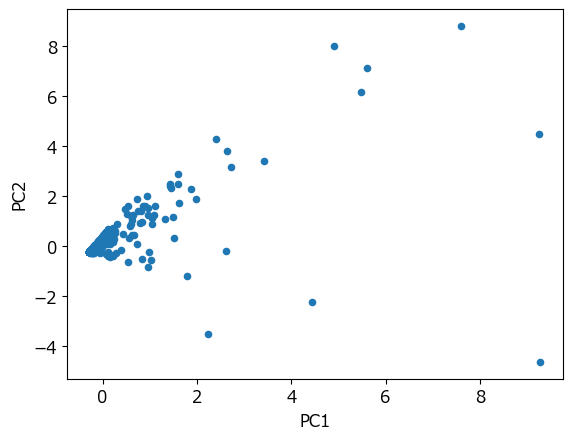

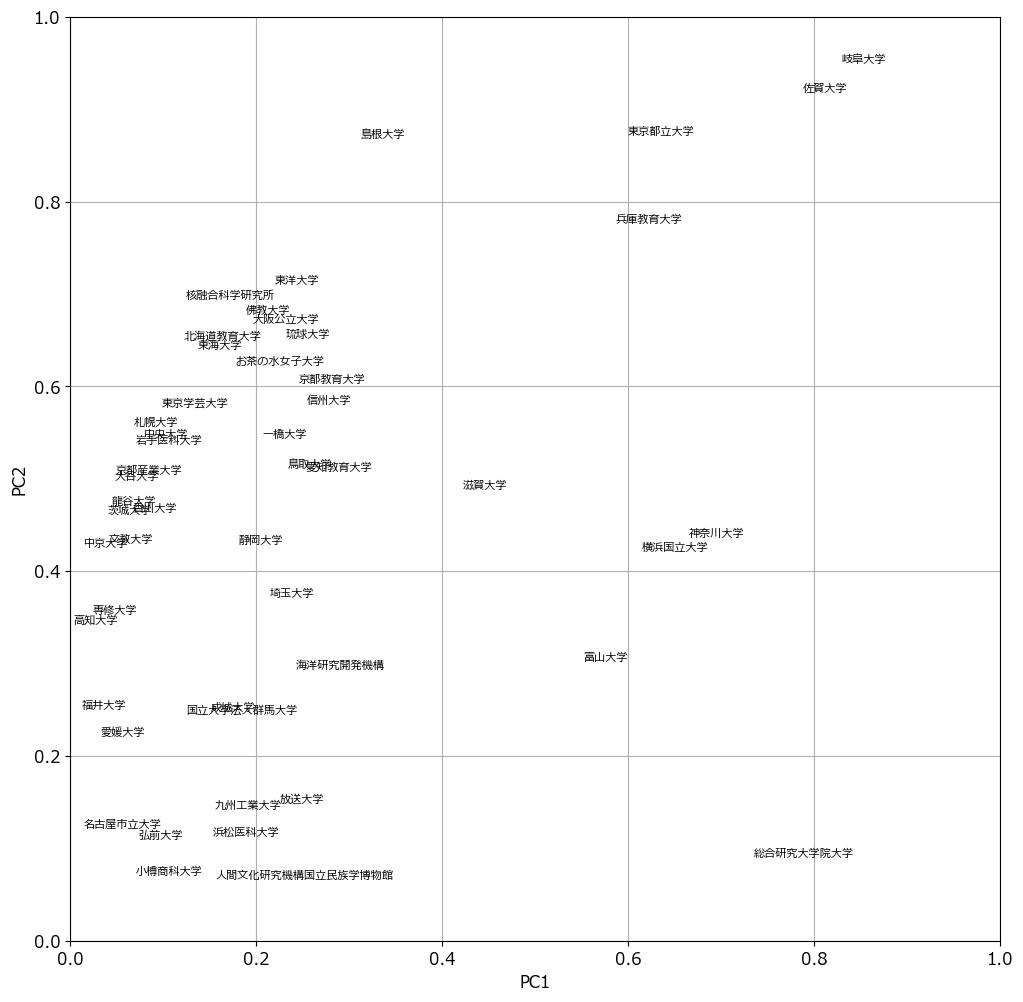

In [57]:
plt.rcParams["font.family"] = "Meiryo"
# 主成分得点を求める
fig, ax = plt.subplots()
pca_tokuten.plot(0,1,kind='scatter',ax=ax)

plt.figure(figsize=(12,12))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

for k, v in pca_tokuten.iterrows():
             plt.annotate(k,xy=(v[0],v[1]),size=8)

In [64]:
pca_tokuten.loc['岐阜大学',:]

PC1    0.829396
PC2    0.950367
PC3   -0.049666
PC4   -0.779943
PC5    0.446454
PC6   -0.797668
PC7   -0.991583
PC8    0.002881
Name: 岐阜大学, dtype: float64

In [ ]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_row, columns=pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=df2205_all_std.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

print(pca.components_[0])
print(pca.components_)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df2205_all.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ValueError: Shape of passed values is (36, 36), indices imply (36, 47)
# TypeError: only size-1 arrays can be converted to Python scalars 
# plt.scatter(pca.components_[0], pca.components_)


# 構成比率

In [66]:
# Total列を追加
df2205_all_d = pd.concat([df2205_all_d, pd.DataFrame(
    df2205_all_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_honbun_d = pd.concat([df2205_honbun_d, pd.DataFrame(
    df2205_honbun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_sabun_d = pd.concat([df2205_sabun_d, pd.DataFrame(
    df2205_sabun_d.sum(axis=1), columns=['Total'])], axis=1)
df2205_all_d
# Totalの降順にソートする
df2205_all_d = df2205_all_d.sort_values(by='Total', ascending=False)
df2205_honbun_d = df2205_honbun_d.sort_values(by='Total', ascending=False)
df2205_sabun_d = df2205_sabun_d.sort_values(by='Total', ascending=False)
# df2205i_sabun_d

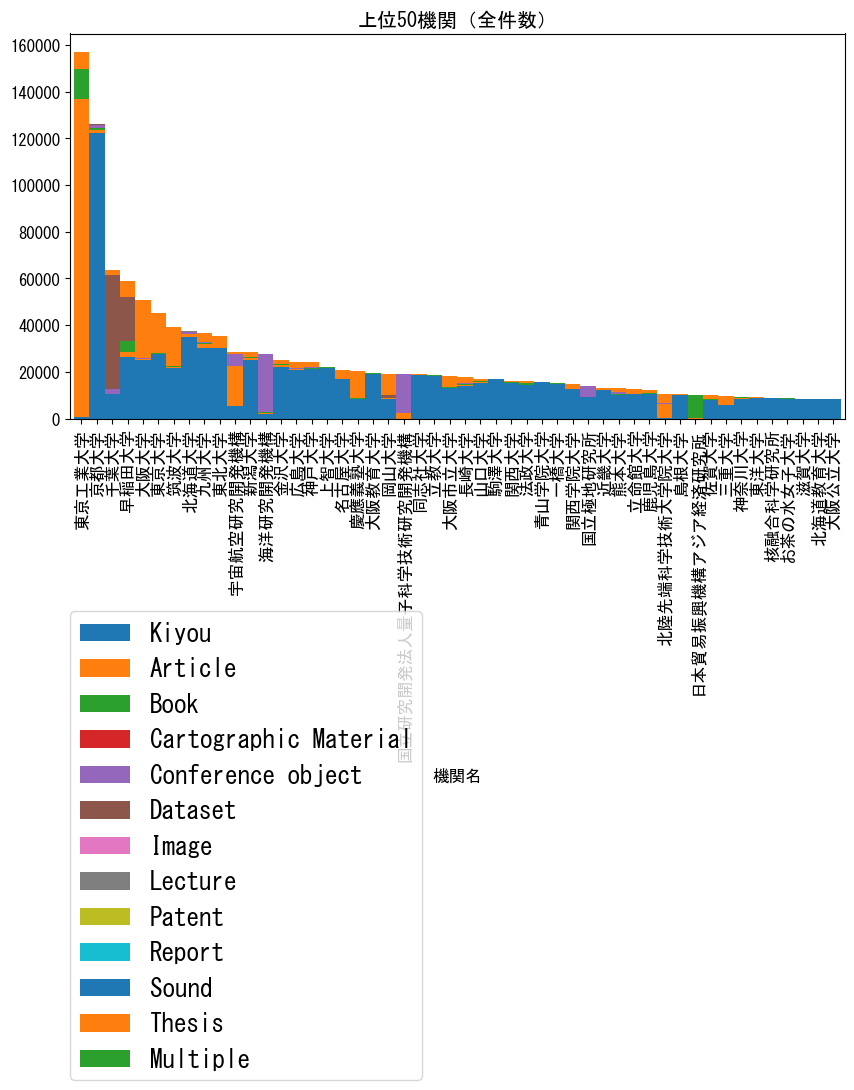

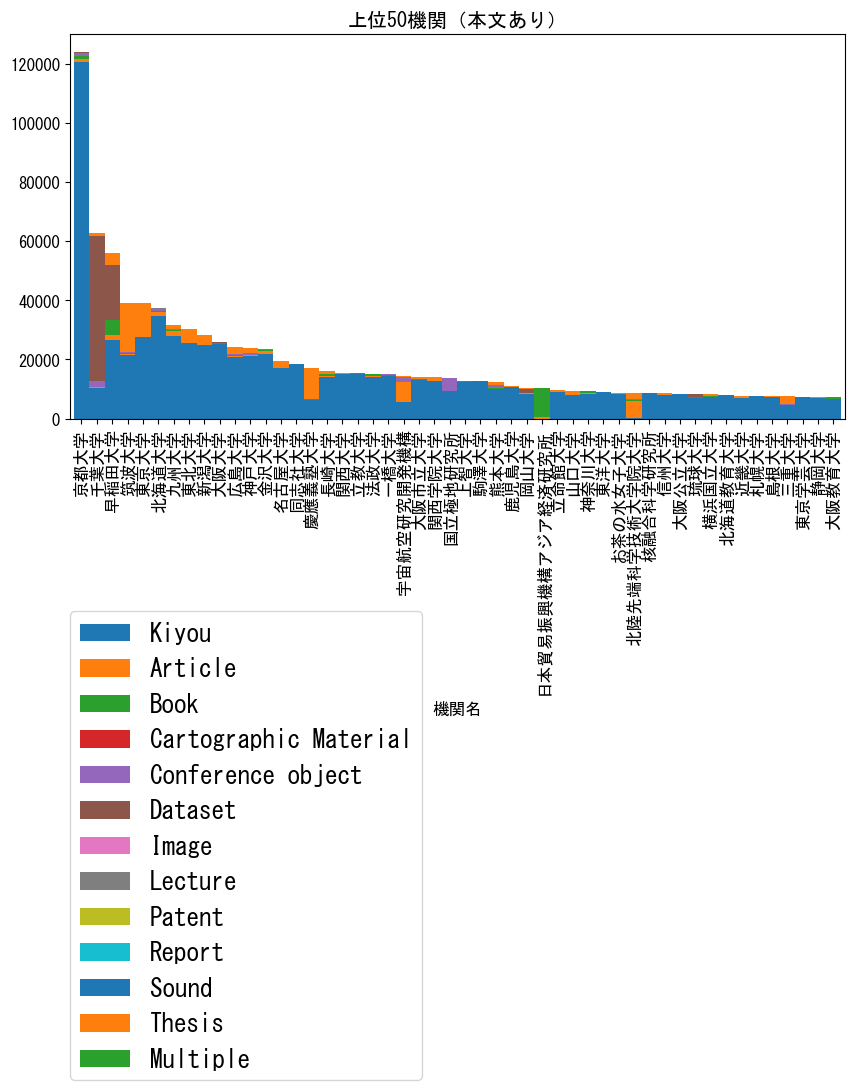

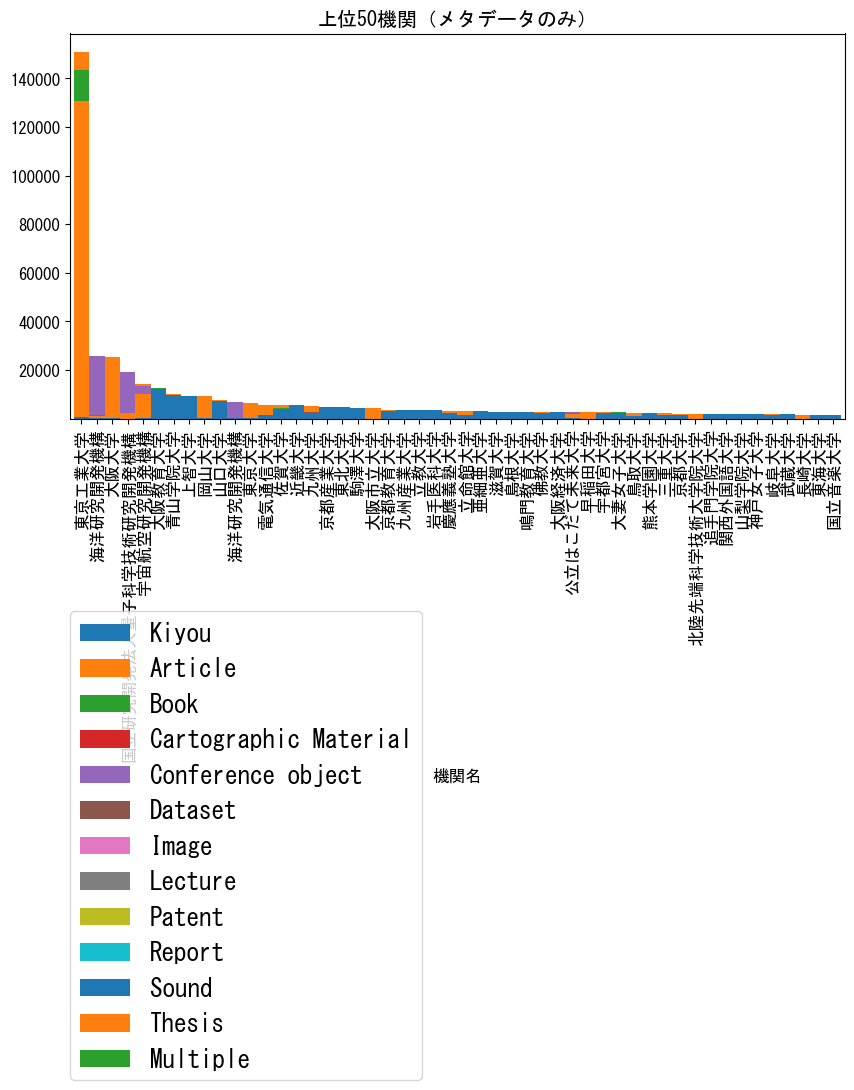

In [67]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df2205_all_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（全件数）',)\
     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205_honbun_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（本文あり）',)\
     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205_sabun_d.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関（メタデータのみ）',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
# 全てでグラフを描くと32.7s
# df2205i_all_d3.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',).legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)



In [ ]:
# 行ごとの百分率に変換する
df2205i_all_d4 = df2205i_all_d3.div(
    df2205i_all_d3['Total'], axis=0).mul(100)  # .round(2) 四捨五入
# 判例の位置調整　https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
#df2205i_all_d4.iloc[:50, ].drop("Total", axis=1)\
#    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df2205i_all_d4.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# Kiyouの降順にソートする
df2205i_all_d5 = df2205i_all_d4.sort_values(by='Kiyou', ascending=False)
df2205i_all_d5.drop("Total", axis=1)\
    .plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='資料タイプ別百分率',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 特徴量スケーリング（正規化）
import numpy as np

df2205i_all_d3.head()

# Min-Max Normalization
df_norm = (df2205i_all_d3-df2205i_all_d3.min()) / \
    (df2205i_all_d3.max()-df2205i_all_d3.min())
    
print("Scaled Dataset Using Pandas")
df_norm.head()


In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_norm.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
print(df2205i_all_d3.columns.to_list())

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df2205i_honbun_d.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'])
df_scaled.head()


In [ ]:
import seaborn as sns
cor = df_scaled[['Kiyou', 'Article', 'Book', 'Cartographic Material', 'Conference object',
                         'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].corr()
cor.dropna(how="all", axis=0, inplace=True)
cor.dropna(how="all", axis=1, inplace=True)
p = sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
p.set(title = "資源タイプごとの相関係数（本文あり）")
# ヒートマップを出力
#https://qiita.com/Tom-tom-tom/items/f0e7800fbe72fd729a8d



In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
# df_norm.iloc[:50, ].drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
#     .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)
df_scaled.drop("Total", axis=1).plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
# 転置
df2205T = df2205i_all_d3.T
# df2205T.loc['Total',]
df2205T = df2205T.drop('Total', axis=0)

In [ ]:
col_list = df2205T.columns.to_list()

In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled2 = std_scaler.fit_transform(df2205T.to_numpy())
df_scaled2 = pd.DataFrame(df_scaled2, columns=col_list)

print("Scaled Dataset Using StandardScaler")
df_scaled2  # .head()

In [ ]:
# コンテンツ数上位50機関で構成比率の積み上げグラフ化
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
df_scaled2.T.plot(kind='bar', stacked=True, figsize=(10, 5), width=1, linewidth=0, title='上位50機関',)\
    .legend(bbox_to_anchor=(0, -0.5), loc='upper left', borderaxespad=0, fontsize=18)


In [ ]:
df2205_all_d.drop(['Total'], axis=1, inplace=True)
df2205_honbun_d.drop(['Total'], axis=1, inplace=True)
df2205_sabun_d.drop(['Total'], axis=1, inplace=True)

In [ ]:
df2205i_all_d3.head()


In [ ]:
df2205_2jiku = df2205_all_d.copy()
df2205_2jikuh = df2205_honbun_d.copy()
df2205_2jiku['igai'] = df2205_2jiku.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object','Dataset',\
    'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jiku = df2205_2jiku.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
df2205_2jikuh['igai'] = df2205_2jikuh.loc[:, ['Article', 'Book', 'Cartographic Material', 'Conference object', 'Dataset',
                                            'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple']].sum(axis=1).copy()
df2205_2jikuh = df2205_2jikuh.drop(['Article', 'Book', 'Cartographic Material', 'Conference object',
                                 'Dataset', 'Image', 'Lecture', 'Patent', 'Report', 'Sound', 'Thesis', 'Multiple', 'Total'], axis=1)
# kiyou = df2205i_all_d3.loc[:,'Kiyou'].c
# print(df2205_2jiku['kiyou'])
df2205_2jikuh.head()


In [ ]:
df2205_2jiku.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
df2205_2jikuh.plot.scatter(x='Kiyou', y='igai', alpha=0.5)

In [ ]:
# 各列の最大値のindexを表示
print(df2205_2jiku.idxmax())
print(df2205_2jikuh.idxmax())


In [ ]:
# 六角形ビニング図（hexbin plot）https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
# 外れ値との差が多すぎると意味がない
df2205_2jiku.plot.hexbin(x='Kiyou', y='igai', gridsize=200, sharex=False)


In [ ]:
# 特徴量スケーリング（標準化）
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled3 = std_scaler.fit_transform(df2205_2jiku.to_numpy())
df_scaled3 = pd.DataFrame(df_scaled3, columns=['Kiyou', 'igai'])

print("Scaled Dataset Using StandardScaler")
df_scaled3.head()


In [ ]:
df_scaled3.plot.scatter(x='Kiyou', y='igai', alpha=0.5)
